Courant Number (<.5): 0.1


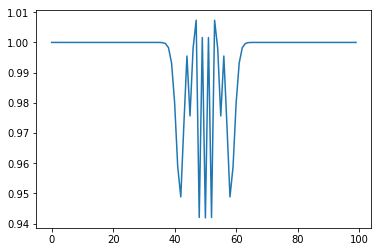

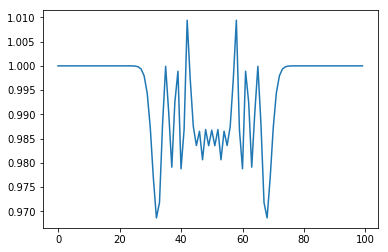

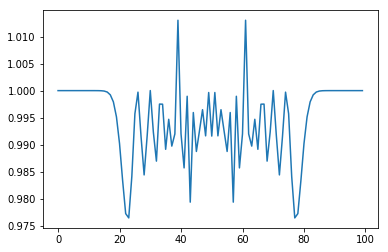

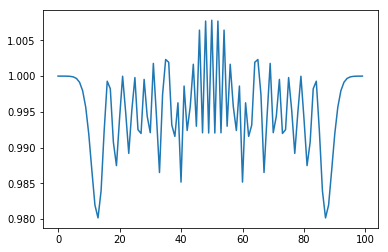

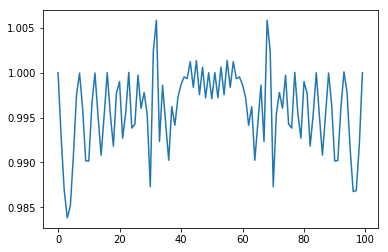

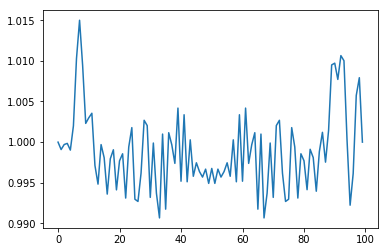

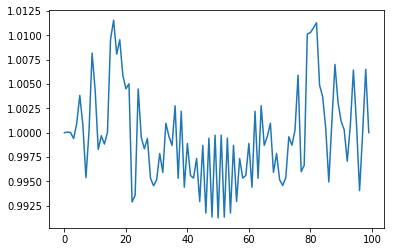

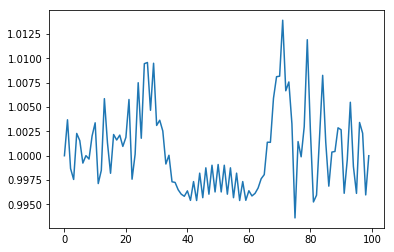

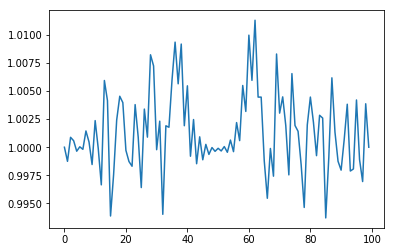

In [30]:
import numpy as np
import matplotlib.pyplot as plt
NX = 100
NY = 100
DT = .001
NT = 1000
p = np.ones([NT, NX, NY])
f = np.zeros([NT, NX, NY])
#f[:,50,50] = 1.1
D = 1.0 / NX
c = 1
p[0,50,50] = 1.0 + .001
print 'Courant Number (<.5): ' + str( c * DT / D)

for t in range(1,NT-1):
    
    #Dirichlet
    if 1:
        p[t+1,0,:] = 1.0
        p[t+1,NX-1,:] = 1.0
        p[t+1,:,0] = 1.0
        p[t+1,:,NY-1] = 1.0
        
    #Neumann (not working)    
    if 0:
        p[t+1,0,0]        = 1.0
        p[t+1,NX-1,0]     = 1.0
        p[t+1,0, NY-1]    = 1.0
        p[t+1, NX-1,NY-1] = 1.0
        

        for j in range(1,NY-1):
            p[t+1,0,j] = DT*c*c*( (-2.0*p[t,0,j] + 2.0*p[t,1,j] ) / (DX*DX) + (p[t,0,j-1] -2.0*p[t,0,j] + p[t,0,j+1]) /(DY*DY) ) +  DT*f[t,0,j] + p[t,0,j]
            p[t+1,NX-1,j] = DT*c*c*( (-2.0*p[t,NX-1,j] +2.0*p[t,NX-2,j] ) / (DX*DX) + (p[t,NX-1,j-1] -2.0*p[t,NX-1,j] + p[t,NX-1,j+1]) /(DY*DY) ) +  DT*f[t,NX-1,j] + p[t,NX-1,j]

        for i in range(1,NY-2):
            p[t+1,i,0] = DT*c*c*( (-2.0*p[t,i,0] + 2.0*p[t,i,1] ) / (DY*DY) + (p[t,i-1,0] -2.0*p[t,i,0] + p[t,i+1,0]) /(DX*DX) ) +  DT*f[t,i,0] + p[t,i,0]
            p[t+1,i,NY-1] = DT*c*c*( (-2.0*p[t,i,NY-1] + 2.0*p[t,i+1,NY-2]) / (p[t,i-1,NY-1] -2.0*p[t,i,NY-1] + p[t,i+1,NY-1]) /(DX*DX) ) +  DT*f[t,i,NY-1] + p[t,i,NY-1]
    
    if(t%100 == 0):
        plt.figure()
        plt.plot( p[t,50,:])
        plt.show()
            
    for i in range(1,NX-1):
        for j in range(1,NY-1):
            #p[t+1,i,j] = DT*c*c*( (p[t,i-1,j] - 2.0*p[t,i,j] + p[t,i+1,j]) / (DX*DX) + (p[t,i,j-1] - 2.0*p[t,i,j] + p[t,i,j+1]) /(DY*DY) ) +  DT*f[t,i,j] + p[t,i,j]
            p[t+1,i,j] = DT*DT*c*c* (-4.0*p[t,i,j] + p[t,i-1,j] + p[t,i+1,j] + p[t,i,j-1] + p[t,i,j+1]  )/(D*D) + (+2.0*p[t,i,j] - p[t-1,i,j]) + DT*DT*f[t,i,j] 

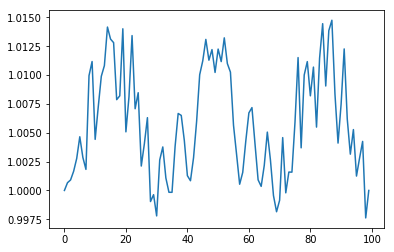

In [32]:
plt.figure()
plt.plot( p[-1,:,50])
plt.show()